ASSIGNMENT 8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [3]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [4]:
df.shape

(804, 12)

In [5]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

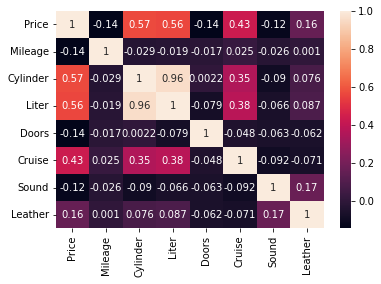

In [6]:
import seaborn as sns
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [7]:
x=df[['Price']]
y=df['Mileage']
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [8]:
print('intercept:', lin_reg.intercept_)
print('coefficients:', lin_reg.coef_)

intercept: 22363.54215594064
coefficients: [-0.11861458]


Equation for linear regression is y=-0.1186*x+ 22363.5421

Text(0.5, 1.0, 'Mileage vs Price')

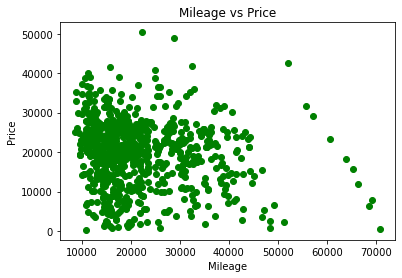

In [10]:
plt.scatter(x, y, color='g')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

In [11]:
print('r-squared:', lin_reg.score(x, y))

r-squared: 0.020463447323489037


R2 Score is 0.0204 which indicates there is least correlation between mileage and price and aslo the model is bad.

In [12]:
feature = ['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x=df[feature]
y=df['Price']
lr = linear_model.LinearRegression()
lr.fit(x, y)

LinearRegression()

In [14]:
print('Features & Coefficients')
print(list(zip(feature, lr.coef_)))

Features & Coefficients
[('Mileage', -0.16974783233303697), ('Cylinder', 3792.3789307825155), ('Liter', -787.2207316338224), ('Doors', -1542.7458463820678), ('Cruise', 6288.997149849927), ('Sound', -1993.7952756984266), ('Leather', 3349.361619613554)]


In [15]:
lr.intercept_

6758.755143598077

In [16]:
lr.score(x,y)

0.446264353672838

this is not good model

In [17]:
import itertools as it 
def lin_r2(feature, df, p='Price'):
    input = df[feature]
    output = df[p]
    lr = linear_model.LinearRegression()
    lr.fit(input,output)
    return lr.score(input,output)
def get_combo(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

combos = get_combo(feature)
def all_combo_scores(combos, df, focus='Price'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_r2(list(n), df, focus)] = n
    return combo_scores
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.446264353672838,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.44569092105870245,
  ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.437805741536638,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')),
 (0.4369402151237246, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')),
 (0.43014148406475605,
  ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')),
 (0.43001820483252684, ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')),
 (0.4265348637809261,
  ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4257681327974422, ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42482840454267856,
  ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42441824017998775,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')),
 (0.42409748258510405, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')),
 (0.4225307670398466, ('Mileage', 'Cylinder', 'Liter', 'Cruise'

There is no combination that produces a strong relation
Comparitively these are best possible feature combinations with highest R2 score.
0.4462643536728379- ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')

0.44569092105870245- ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')

0.437805741536638- ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')

The cylinder feature has the high score of 0.32385903759512247

In [19]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [20]:
df.drop(['Trim'],axis=1,inplace=True)
df_dummy = df.copy()

df_make = pd.get_dummies(df['Make'])
df_dummy[list(df_make.columns)] = df_make
df_dummy.pop('Make')


df_model = pd.get_dummies(df['Model'])
df_dummy[list(df_model.columns)] = df_model
df_dummy.pop('Model')

df_type = pd.get_dummies(df['Type'])
df_dummy[list(df_type.columns)] = df_type
df_dummy.pop('Type')

pd.set_option('display.max_columns', None)
df_dummy.head(10)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn,9-2X AWD,9_3,9_3 HO,9_5,9_5 HO,AVEO,Bonneville,CST-V,CTS,Cavalier,Century,Classic,Cobalt,Corvette,Deville,G6,GTO,Grand Am,Grand Prix,Impala,Ion,L Series,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Convertible,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,15709.052821,22236,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,15230.003390,22576,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,15048.042184,22964,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,14862.093870,24021,6,3.1,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,15295.018267,27325,6,3.1,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [21]:
df_dummy.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB',
       'Saturn', '9-2X AWD', '9_3', '9_3 HO', '9_5', '9_5 HO', 'AVEO',
       'Bonneville', 'CST-V', 'CTS', 'Cavalier', 'Century', 'Classic',
       'Cobalt', 'Corvette', 'Deville', 'G6', 'GTO', 'Grand Am', 'Grand Prix',
       'Impala', 'Ion', 'L Series', 'Lacrosse', 'Lesabre', 'Malibu',
       'Monte Carlo', 'Park Avenue', 'STS-V6', 'STS-V8', 'Sunfire', 'Vibe',
       'XLR-V8', 'Convertible', 'Coupe', 'Hatchback', 'Sedan', 'Wagon'],
      dtype='object')

In [22]:
df_dummy.shape

(804, 51)

In [23]:
columns = list(df_make.columns)
columns.extend(df_model.columns)
columns.extend(df_type.columns)
input_cols = []
for item in columns:
    input_cols.append([item])
input_cols

[['Buick'],
 ['Cadillac'],
 ['Chevrolet'],
 ['Pontiac'],
 ['SAAB'],
 ['Saturn'],
 ['9-2X AWD'],
 ['9_3'],
 ['9_3 HO'],
 ['9_5'],
 ['9_5 HO'],
 ['AVEO'],
 ['Bonneville'],
 ['CST-V'],
 ['CTS'],
 ['Cavalier'],
 ['Century'],
 ['Classic'],
 ['Cobalt'],
 ['Corvette'],
 ['Deville'],
 ['G6'],
 ['GTO'],
 ['Grand Am'],
 ['Grand Prix'],
 ['Impala'],
 ['Ion'],
 ['L Series'],
 ['Lacrosse'],
 ['Lesabre'],
 ['Malibu'],
 ['Monte Carlo'],
 ['Park Avenue'],
 ['STS-V6'],
 ['STS-V8'],
 ['Sunfire'],
 ['Vibe'],
 ['XLR-V8'],
 ['Convertible'],
 ['Coupe'],
 ['Hatchback'],
 ['Sedan'],
 ['Wagon']]

I would like to look at all of the two-factor combinations of the features list that I use for Task 2 plus each of the new dummy columns. I would like to report what the highest scores are.

In [24]:
features = ['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
combo_twos = list(it.combinations(features, 2))
combo_twos_list = [[x[0], x[1]] for x in combo_twos]
combo_twos_list

[['Mileage', 'Cylinder'],
 ['Mileage', 'Liter'],
 ['Mileage', 'Doors'],
 ['Mileage', 'Cruise'],
 ['Mileage', 'Sound'],
 ['Mileage', 'Leather'],
 ['Cylinder', 'Liter'],
 ['Cylinder', 'Doors'],
 ['Cylinder', 'Cruise'],
 ['Cylinder', 'Sound'],
 ['Cylinder', 'Leather'],
 ['Liter', 'Doors'],
 ['Liter', 'Cruise'],
 ['Liter', 'Sound'],
 ['Liter', 'Leather'],
 ['Doors', 'Cruise'],
 ['Doors', 'Sound'],
 ['Doors', 'Leather'],
 ['Cruise', 'Sound'],
 ['Cruise', 'Leather'],
 ['Sound', 'Leather']]

In [25]:
from copy import deepcopy
def all_combos_plus_scores(combos, combo_addition, df_dummy, focus='Price'):
    scores = {}
    for c_a in combo_addition:
        combos_c = deepcopy(combos)
        for cb in combos_c:
            cb.extend(c_a)
            scores[(cb[0], cb[1], cb[2])] = lin_r2(cb, df_dummy, focus)
    return scores
car_data_combos = all_combos_plus_scores(combo_twos_list, input_cols, df_dummy)
car_data_combos_list = sorted(car_data_combos.items(), key=lambda c: c[1], reverse=True)
max_dict = {}
for score_ in car_data_combos_list:
    try:
        max_dict[score_[0][2]]
    except:
        max_dict[score_[0][2]] = score_[1]
        print(score_[1], score_[0])

0.6952326188089184 ('Mileage', 'Cylinder', 'SAAB')
0.5827463723115367 ('Liter', 'Cruise', 'Cadillac')
0.5818864330871814 ('Cylinder', 'Cruise', 'Convertible')
0.5565646069943804 ('Cylinder', 'Doors', 'Coupe')
0.5183767328460664 ('Liter', 'Cruise', 'XLR-V8')
0.4677007997077759 ('Cylinder', 'Cruise', '9_3 HO')
0.46131412749530276 ('Cylinder', 'Doors', 'Chevrolet')
0.44031377831419116 ('Cylinder', 'Cruise', '9_5')
0.42327964442945454 ('Cylinder', 'Cruise', 'Pontiac')
0.4209127935020318 ('Cylinder', 'Cruise', 'Wagon')
0.41425766320268764 ('Cylinder', 'Cruise', '9_3')
0.4094908134557421 ('Cylinder', 'Cruise', '9_5 HO')
0.40853637029735634 ('Cylinder', 'Cruise', 'Sedan')
0.40801434993536767 ('Cylinder', 'Cruise', 'Buick')
0.4066332114627612 ('Cylinder', 'Cruise', 'CST-V')
0.4061981380211488 ('Cylinder', 'Cruise', 'Grand Prix')
0.4039216683852761 ('Cylinder', 'Cruise', 'Malibu')
0.4028424051921041 ('Cylinder', 'Cruise', 'STS-V6')
0.4024100042889771 ('Cylinder', 'Cruise', 'Bonneville')
0.40004

In [26]:
car_data_2 = {}
for item in deepcopy(input_cols):
    car_data_2[item[0]] = lin_r2(item, df_dummy)

score_list2 = sorted(car_data_2.items(), key=lambda c: c[1], reverse=True)
for score in score_list2:
    print(score[1], score[0])

0.43467222055774146 Cadillac
0.25808237266623624 Convertible
0.22329254532193277 XLR-V8
0.16369972777296582 Chevrolet
0.11249608486981633 SAAB
0.09268208373129971 AVEO
0.08811897712425065 Deville
0.08294059063514281 Corvette
0.07236606185907579 CST-V
0.060443061923161845 STS-V8
0.059386315780149745 Cavalier
0.04481729286980152 Saturn
0.044294927303921816 9_3 HO
0.042509414286992286 Hatchback
0.04218076819132699 Ion
0.03711188670126875 Cobalt
0.0331684123827396 STS-V6
0.02992939459223687 9_5
0.028253210000207085 Coupe
0.020191011838045725 Pontiac
0.01551727999156971 9_3
0.01441266225511073 Malibu
0.012235997496740647 9_5 HO
0.011848005294655573 Vibe
0.010715368384112356 CTS
0.00990383596925093 Sunfire
0.008683138908399224 Grand Am
0.007825848896145682 GTO
0.007741907120061953 Classic
0.004735027107433676 Grand Prix
0.003698911729677512 Century
0.0029638255654020895 L Series
0.0020370652981834825 Wagon
0.001866756188844798 Park Avenue
0.00121119693448557 Sedan
0.0008950546441520713 Monte

We are taking the best three R2 score dummy variables Cadillac, Convertible,XLR-V8 into account and find the model R2 score

In [29]:
#If we take Cadillac, Convertible,Chevrolet as features then R2 will be
f = features + ['Cadillac', 'Convertible', 'Chevrolet']
lin_r2(f, df_dummy)

0.8301641680699674

In [28]:
f = ['Cadillac', 'Convertible', 'Chevrolet', 'Mileage', 'Cylinder', 'Cruise', 'Liter']
lin_r2(f,df_dummy)

0.8230830294947846

So we can conclude that the three factors from Model,Make and Type needs to be considered along other numerical features to get the best model with a R2 score of 0.823